In [ ]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt 
import PIL
import tensorflow as tf
import cv2 as cv
import math

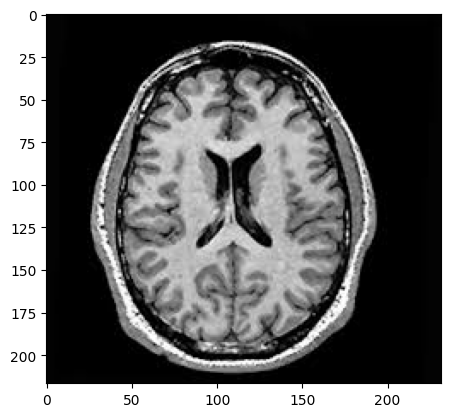

In [ ]:
image = cv.imread('brain.jpg')

# Plot original image
plt.imshow(image)

# **Image Filtering**

### **Mean filter**

####**Definition**

A **mean filter**, also known as an **average filter**, is a type of image processing filter that is commonly used to reduce image noise and smooth out the image. The filter works by replacing each pixel in the image with the average value of the pixels in its surrounding neighborhood.

####**How it works?**

The process of applying a mean filter involves sliding a small rectangular window, or kernel, over each pixel in the image. The size of the kernel is typically odd, such as $3$x$3$, $5$x$5$, or $7$x$7$, to ensure that there is a central pixel in the neighborhood. For each pixel, the filter calculates the average value of the pixel intensities within the kernel and assigns that value to the central pixel.

####**Result**

The effect of the mean filter is to smooth out the image by reducing high-frequency noise while preserving the overall structure of the image. However, the filter can also cause blurring and loss of fine detail, depending on the size of the kernel used.

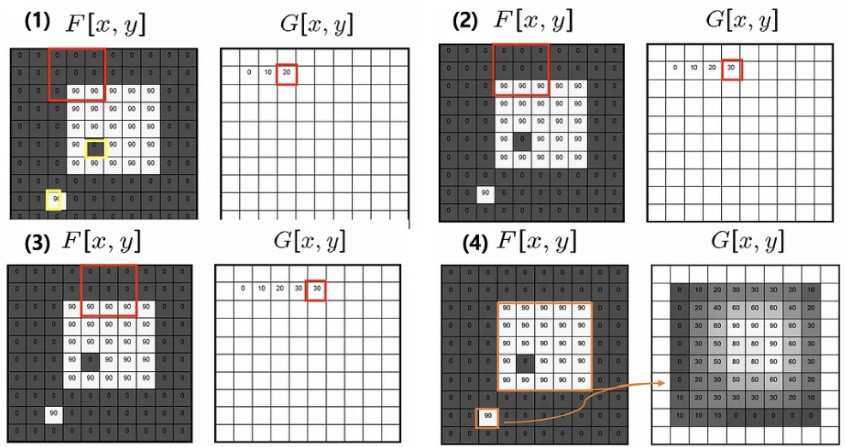

####**Mathematic formula**

$G(x, y) = \sum_{i=-n}^n \sum_{j=-n}^n F(j, i) I(x+j, y+i)$

Where:

* $i$ for row index
* $j$ for column index
* $n$ for number of pixel from center of filter to the edge
* $F$ for filter matrix
* $I$ for matrix from image
* $G$ for matrix from resulting image

(<matplotlib.image.AxesImage at 0x7f631de37280>, Text(0.5, 1.0, 'Mean'))

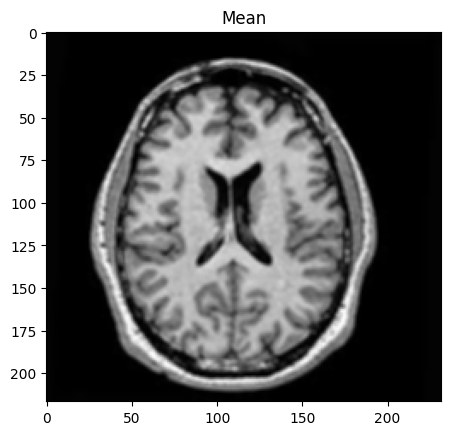

In [ ]:
# Plot image with mean filter applied
blurred1 = cv.blur(image, (3, 3))
plt.imshow(blurred1),plt.title('Mean')

### **Median filter**

####**Definition**

A median filter is a type of digital image processing filter that is used to reduce noise in an image. It works by replacing each pixel in the image with the median value of the pixels in its surrounding neighborhood.

####**How it works?**

The process of applying a median filter involves sliding a small rectangular window, or kernel, over each pixel in the image, as it did with a mean filter. The size of the kernel is typically odd, such as 3x3, 5x5, or 7x7, to ensure that there is a central pixel in the neighborhood. For each pixel, the filter calculates the median value of the pixel intensities within the kernel and assigns that value to the central pixel.

####**Result**

The effect of the median filter is to reduce noise in the image while preserving edges and fine details, as the median value is less sensitive to extreme values compared to the mean value used in a mean filter. Unlike the mean filter, which can cause blurring and loss of fine detail, the median filter can sometimes enhance edges and details in the image.

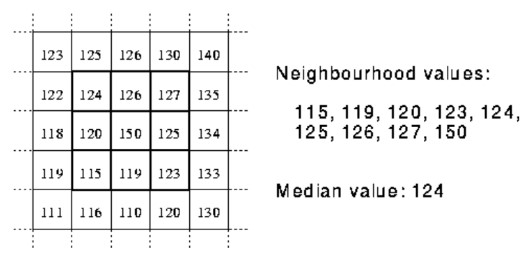

####**Mathematic form**

$G(x, y) = median ( I(j, i) | j=x-n, ..., x+n, i=y-n, ..., y+n )$

Where:

* $i$ for row index
* $j$ for column index
* $n$ for number of pixel from center of filter to the edge
* $I$ for matrix from image
* $G$ for matrix from resulting image

(<matplotlib.image.AxesImage at 0x7f631bce92a0>, Text(0.5, 1.0, 'Median'))

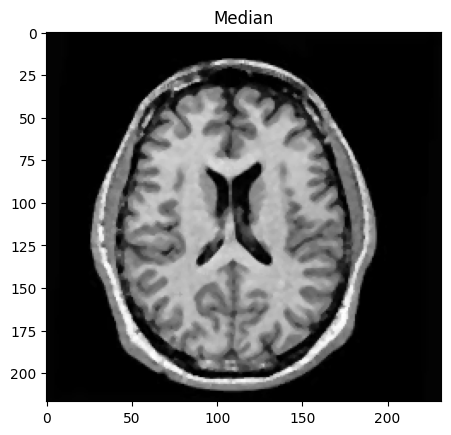

In [ ]:
# Plot image with median filter applied
blurred2 = cv.medianBlur(image, 3)
plt.imshow(blurred2),plt.title('Median')

### **Gaussian filter**

####**Definition**
A **Gaussian filter** is a type of digital image processing filter that is commonly used to reduce noise and smooth out images.

####**How it works?**
It works by convolving the image with a Gaussian kernel, which is a mathematical function that describes a bell-shaped curve. 
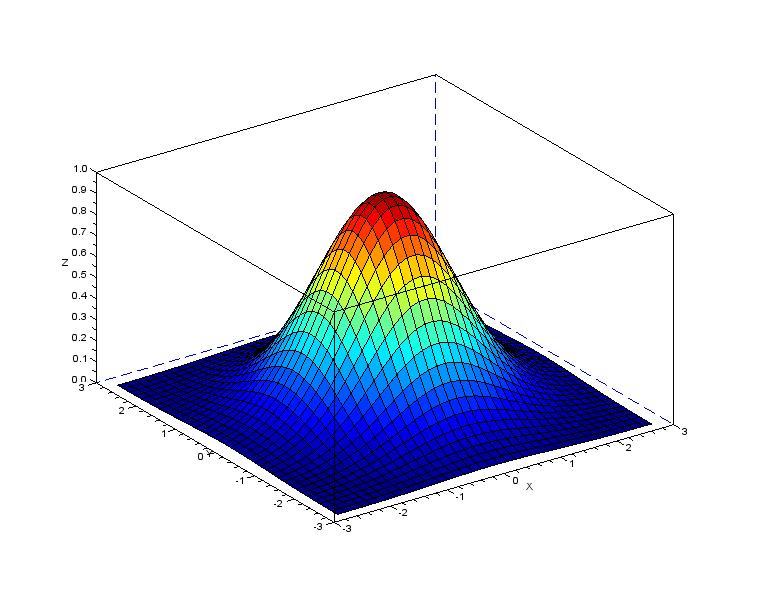

The process of applying a Gaussian filter involves sliding a small rectangular window, or kernel, over each pixel in the image. The size of the kernel is typically odd, such as $3$x$3$, $5$x$5$, or $7$x$7$, to ensure that there is a central pixel in the neighborhood. For each pixel, the filter calculates the weighted average of the pixel intensities within the kernel, where the weights are determined by the values of the Gaussian function at the corresponding pixel positions.

Mathematically, we can express the filter by:
$$G(x, y, \sigma) = \frac{1}{2\pi\sigma^2} exp( -\frac{x^2 + y^2}{2\sigma^2} )$$

where x, y as the distance from origin (center) in horizontal / vertical direction, and sigma as a scale, which is a scaling factor that decides the area of smoothing.

####**Why to use?**
The effect of the Gaussian filter is to smooth out the image by reducing high-frequency noise while preserving the edges and fine details in the image. The filter achieves this by giving more weight to the pixels that are closer to the center of the kernel, where the Gaussian function has higher values, and less weight to the pixels that are farther away from the center.

(<matplotlib.image.AxesImage at 0x7f631a363bb0>, Text(0.5, 1.0, 'Gaussian'))

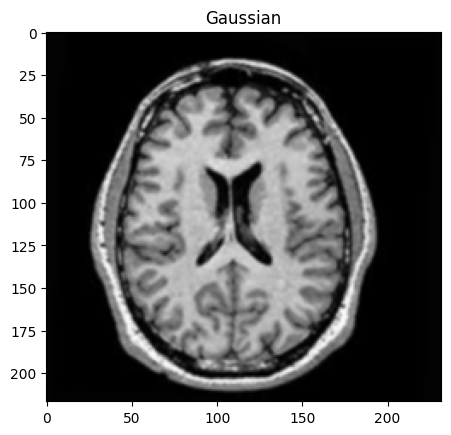

In [ ]:
# Plot image with Gaussian filter applied
blurred3 = cv.GaussianBlur(image, (3, 3), 0)
plt.imshow(blurred3),plt.title('Gaussian')

### **Bilateral filter**

####**Definition**
The bilateral filter is a technique to smooth images while preserving edges. It depends only on two parameters that indicate the size and contrast of the features to preserve.

####**How it works?**
In a manner very similar to Gaussian convolution, the bilateral filter is also defined as a weighted average of nearby pixels, but it additionally considers the difference in value with the neighbors to preserve edges while smoothing. The fundamental principle behind the bilateral filter is that for a pixel to influence another one, it should not only occupy a nearby location but also have a similar value.
The bilateral filter, denoted by $BF[·]$, is defined by this formula:
$$BF[I]_p = \frac{1}{W_p} \sum\limits_{q 𝝐 S} G_{\sigma_{s}}(||p-q||) 
 G_{\sigma_{r}}(|I_p - I_q|)I_q$$
Where normalization factor $W_p$ ensures pixel weights sum to 1.0.
$$W_p = \sum\limits_{q 𝝐 S} G_{\sigma_{s}}(||p-q||) 
 G_{\sigma_{r}}(|I_p - I_q|)$$

The amount of filtering for the image $I$ is specified by parameters $σ_s$ (spatial parameter) and $σ_r$ (range parameter). $G_{σ_s}$ is a spatial Gaussian weighting that reduces the impact of distant pixels, whereas $G_{σ_r}$ is a range Gaussian that reduces the impact of pixels $q$ when their intensity levels differ from $I_p$.

The following figure demonstrates how the weights are selected for a single pixel close to an edge: 



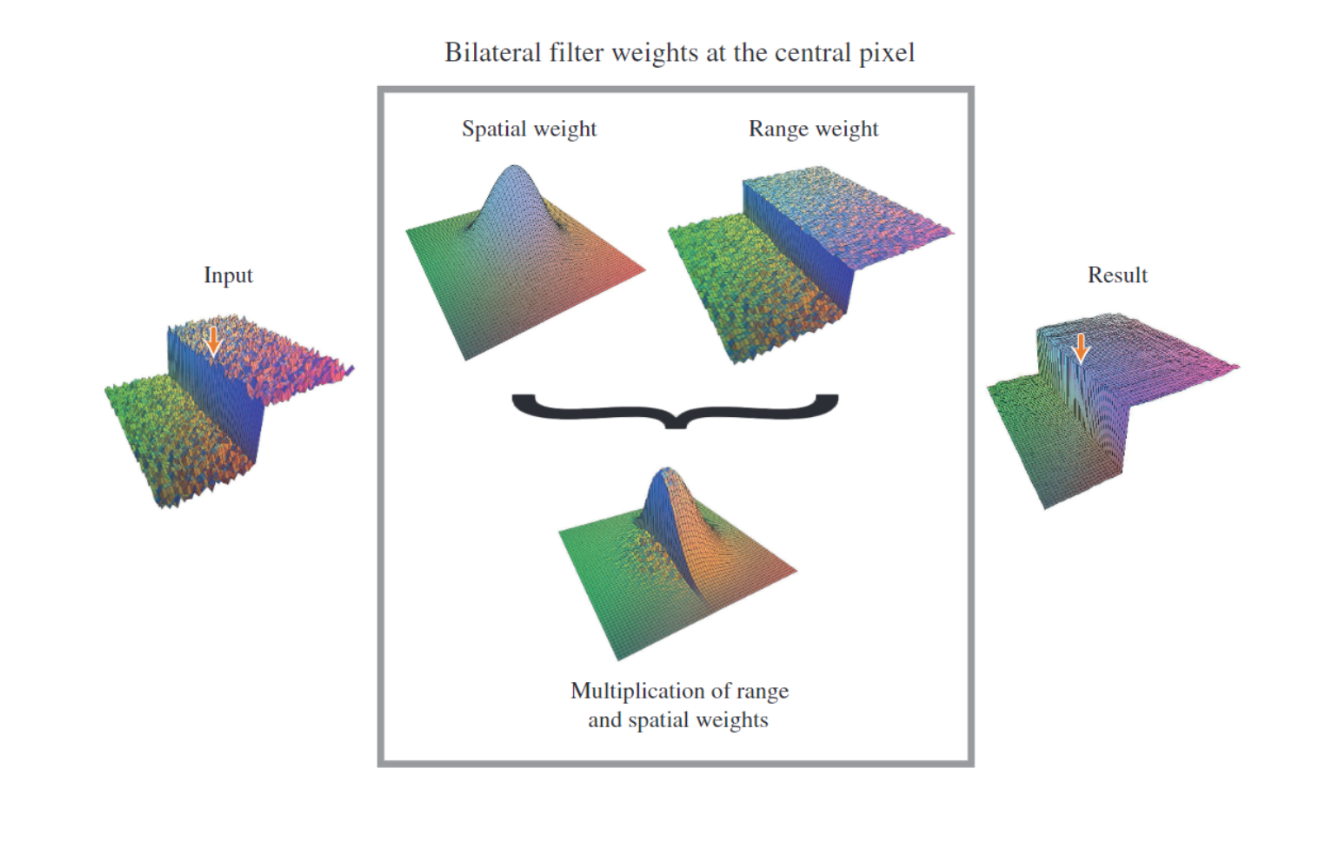

As we mentioned above, the bilateral filter is controlled by two parameters: $σ_s$ and $σ_r$. 
As the range parameter $σ_r$ increases, the bilateral filter gradually approximates Gaussian convolution more closely because the range Gaussian $G_{σ_r}$  widens and flattens, i.e., is nearly constant over the intensity interval of the image. Increasing $σ_s$ leads to smoothing larger features.
#### **Why to use?**
The bilateral filter is useful because it effectively reduces noise in an image while preserving important details and edges. 

(<matplotlib.image.AxesImage at 0x7f631a3ea0e0>, Text(0.5, 1.0, 'Bilateral'))

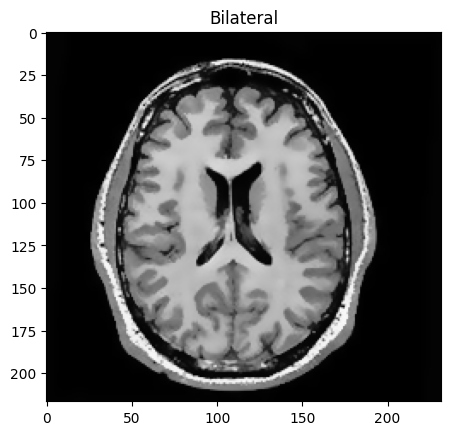

In [ ]:
# Plot image with Bilateral filter applied
blurred4 = cv.bilateralFilter(image,9,75,75)
plt.imshow(blurred4),plt.title('Bilateral')

# **Edge detection**

### **Canny edge detection**

#### **Definition**

**Canny edge detection** is a popular algorithm for detecting edges in digital images. It was developed by John F. Canny in 1986 and is widely used in computer vision applications. The Canny edge detection algorithm is known for its ability to accurately detect edges while minimizing false detections and preserving edge continuity. It can be tuned to achieve different levels of sensitivity and specificity depending on the application requirements.

#### **How it works?**

The process of Canny edge detection involves several steps:

1. **Gaussian smoothing**: The image is convolved with a Gaussian kernel to reduce noise and smooth out the image. The equation for a Gaussian filter kernel of size $(2k+1)×(2k+1)$ is given by ($1 \le i, j\le (2k+1)$):

$$H_{i,j} = \frac{1}{2\pi\sigma^2}exp(-\frac{(i-(k+1))^2 + (j-(k+1))^2}{2\sigma^2});$$


2. **Gradient calculation**: The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators. Smoothened image is filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ($G_x$) and vertical direction ($G_y$). When the image is smoothed, the derivatives $I_x$ and $I_y$ w.r.t. $x$ and $y$ are calculated. It can be implemented by convolving I with Sobel kernels $G_x$ and $G_y$, respectively:

    Then, the magnitude G and the slope θ of the gradient are calculated as follows: 

$$|G| = \sqrt{G_x^2 + G_y^2}$$

$$\theta = arctan(G_y/G_x)$$


3. **Non-maximum suppression**: The gradient image is thinned out by suppressing all but the local maxima in the gradient direction. This helps to preserve the thinnest and strongest edges while suppressing weaker ones. The steps for it are: 
  - Create a matrix initialized to 0 of the same size of the original gradient 
  intensity matrix;
  - Identify the edge direction based on the angle value from the angle matrix;
  - Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
  - Return the image processed with the non-max suppression algorithm.


4. **Double thresholding**: A double thresholding technique is applied to the gradient image to identify potential edge pixels. The image is thresholded twice, using a low threshold and a high threshold. Pixels with gradient magnitudes above the high threshold are considered strong edge pixels, while those with gradient magnitudes below the low threshold are discarded. Pixels with gradient magnitudes between the two thresholds are considered weak edge pixels.

5. **Edge tracking by hysteresis**: The weak edge pixels are connected to the strong edge pixels using a process called hysteresis. Starting from a strong edge pixel, the algorithm follows the weak edges in its neighborhood until no more weak edges are found. This helps to connect the broken edges and suppress the noise. For such step, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. 


#### **Result**

The output of the Canny edge detection algorithm is a binary image where the white pixels represent the edges in the original image.

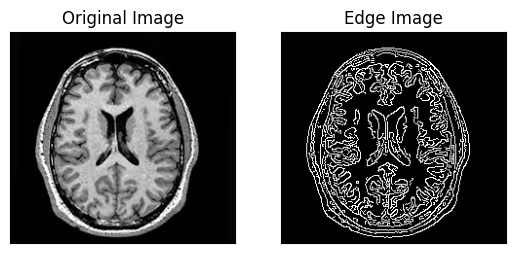

In [ ]:
# Canny edge detection
edges = cv.Canny(image,100,200)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### **Sobel edge detection**

#### **Definition**

**Sobel edge detection** is a commonly used technique for detecting edges in digital images. It is named after its inventor, Irwin Sobel, and works by calculating the gradient of the image intensity at each pixel to detect the edges.

#### **How it works?**

The process of Sobel edge detection involves convolving the image with two $3$x$3$ kernels in the $x$ and $y$ directions ($G_x$ and $G_y$ respectively - on the image below). These kernels are designed to detect horizontal and vertical changes in the image intensity, which correspond to edges in the image. Therefore, the result of the convolution with the Sobel $x$-direction kernel ($G_x$) produces an image that emphasizes edges that are vertical, while the result of the convolution with the Sobel $y$-direction kernel ($G_y$) produces an image that emphasizes edges that are horizontal.

The kernels are applied to the image using convolution, which involves sliding the kernel over each pixel in the image and computing the sum of the element-wise product of the kernel and the corresponding pixels in the neighborhood. The resulting value is assigned to the central pixel in the output image, which represents the gradient magnitude at that location.

$|G| = \sqrt{G_x^2 + G_y^2}$

or the approximate magnitude: (faster to compute)

$|G| = |G_x| + |G_y|$

After computing the gradient magnitude, a threshold can be applied to the output image to identify the edge pixels.

#### **Result**

The resulting image from the Sobel edge detection process shows the locations of edges in the image as bright regions. The magnitude of the brightness at each location corresponds to the strength of the edge.

The Sobel edge detection algorithm is simple, fast, and effective for detecting edges in images with simple and well-defined edges. However, it may produce false positives or miss some edges in images with complex and noisy backgrounds.

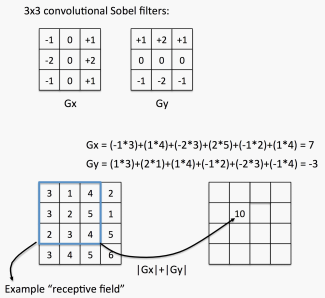

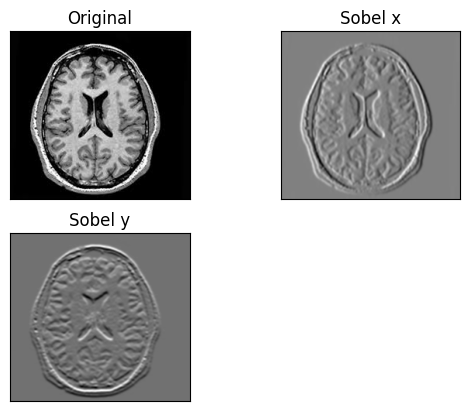

In [ ]:
# Sobel edge detection

# turn image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# apply Gaussian blur
img = cv.GaussianBlur(gray,(3,3),0)

# detect edges with Sobel
G_x = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)  # x
G_y = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)  # y

# plotting images
plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(G_x,cmap = 'gray')
plt.title('Sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(G_y,cmap = 'gray')
plt.title('Sobel y'), plt.xticks([]), plt.yticks([])
plt.show()

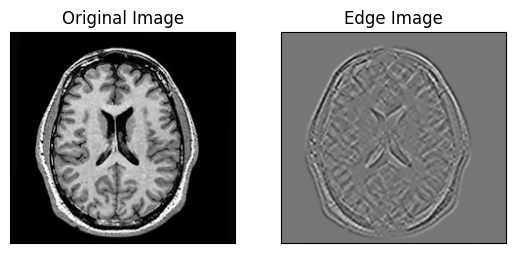

In [ ]:
def detector_sobel_x_y(img):
  sobel_x_y = cv.Sobel(src=img, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5)
  return sobel_x_y

sobel_edges = detector_sobel_x_y(img)
# plt.imshow(sobel_edge_detector_applies, cmap = 'gray'),plt.title('Sobel')

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(sobel_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### **Marr-Hildreth edge detection**


####**Definition**
The Marr-Hildreth edge detector was a very popular edge operator before Canny proposed his algorithm. It is a gradient based operator which uses the Laplacian to take the second derivative of an image after applying the Gaussian filter to the image for smoothing. The idea is that if there is a step difference in the intensity of the image, it will be represented in the second derivative by a zero crossing.
####**How it works?**
The Marr-Hildreth edge detection algorithm consists of the following steps:

1. Gaussian smoothing: The first step is to smooth the input image using a Gaussian filter, which helps to remove noise and small variations in the image intensity. The size of the Gaussian filter and the amount of smoothing are determined by the user or by an automatic parameter selection algorithm.
Matematically, it is:
$$ S = g * I, $$ where S - smoothed image, g - Gaussian filter, I - image (original). As you remember from the Gaussian filter description above, its formula looks the following way:
$$ G(x, y, \sigma) = \frac{1}{2\pi\sigma^2} exp( -\frac{x^2 + y^2}{2\sigma^2} )$$ 

2. Laplacian of Gaussian filtering: Apply a two dimensional Laplacian to the image: this Laplacian will be rotation invariant and is often called the “Mexican Hat operator”. This operation is the equivalent of taking the second derivative of the image.
Laplacian operator:
$$\nabla^2(f) = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2} $$


3. Zero-crossing detection: The third step is to detect the zero-crossings in the filtered image, which correspond to the locations where the Laplacian changes sign. These zero-crossings represent the edges in the image, and can be extracted by thresholding the filtered image and selecting the connected components. Basically, we just Loop through every pixel in the Laplacian of the smoothed image and look for sign changes. If there is a sign change and the slope across this sign change is greater than some threshold, we mark this pixel as an edge. 


####**Why to use?**
The Marr-Hildreth edge detector is a popular edge detection technique that is useful because it can accurately detect edges at varying scales and orientations, and it can also suppress noise and produce thin edges.


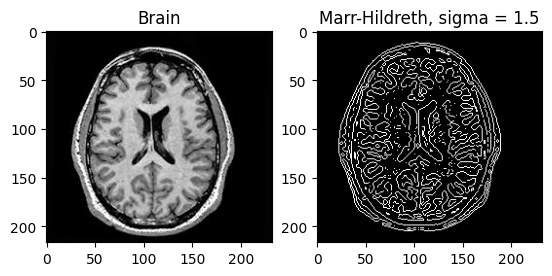

In [ ]:
import argparse
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage import color
from mpl_toolkits.mplot3d import Axes3D


def edgesMarrHildreth(img, sigma):
    """
            finds the edges using MarrHildreth edge detection method...
            :param im : input image
            :param sigma : sigma is the std-deviation and refers to the spread of gaussian
            :return:
            a binary edge image...
    """
    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
        np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)

    # applying filter
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i, j] = np.sum(window)

    log = log.astype(np.int64, copy=False)

    zero_crossing = np.zeros_like(log)

    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 255

    # plotting images
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(img, cmap='gray')
    a.set_title('Brain')


    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(zero_crossing, cmap='gray')
    string = 'Marr-Hildreth, sigma = '
    string += (str(sigma))
    a.set_title(string)
    plt.show()

    return log, zero_crossing

def main():
    img = io.imread("brain.jpg")
    img = color.rgb2gray(img)

    log, zero_crossing = edgesMarrHildreth(img, 1.5)

main()

# contributor https://github.com/adl1995/edge-detectors

# Other

### Hough transform

#### **Definition**
The Hough transform is a technique used in image processing and computer vision for detecting simple geometric shapes, such as lines, circles, and ellipses, in digital images. 

#### **How it works?**
The basic idea of the Hough transform is to represent the image space in a parameter space, where the parameters correspond to the geometric properties of the shapes being detected. For example, in the case of line detection, each pixel in the image space corresponds to a possible line in the parameter space, and vice versa.

The Hough transform algorithm consists of the following steps:

1. Edge detection: The first step is to extract the edges from the input image using an edge detection algorithm, such as Canny edge detection. We covered this part in the Canny edge detection section.

2. Parameter space accumulation: For each edge point in the image space, the algorithm computes a set of parameters that correspond to a possible line passing through that point. These parameters are then used to accumulate votes in the parameter space, where each vote represents a possible line passing through the corresponding set of parameters.

3. Thresholding: The parameter space is thresholded to select the most significant peaks, which correspond to the lines with the highest number of votes. This step helps to remove false positives and noise in the image.

4. Line extraction: The final step is to extract the lines corresponding to the significant peaks in the parameter space. This is done by mapping each peak back to the image space, where it corresponds to a line passing through the corresponding set of parameters.

Here is a simple example of fitting a set of straight lines through 4 points  (e.g. pixel locations output from an edge detector). As you can see there are a few different solutions for this problem:
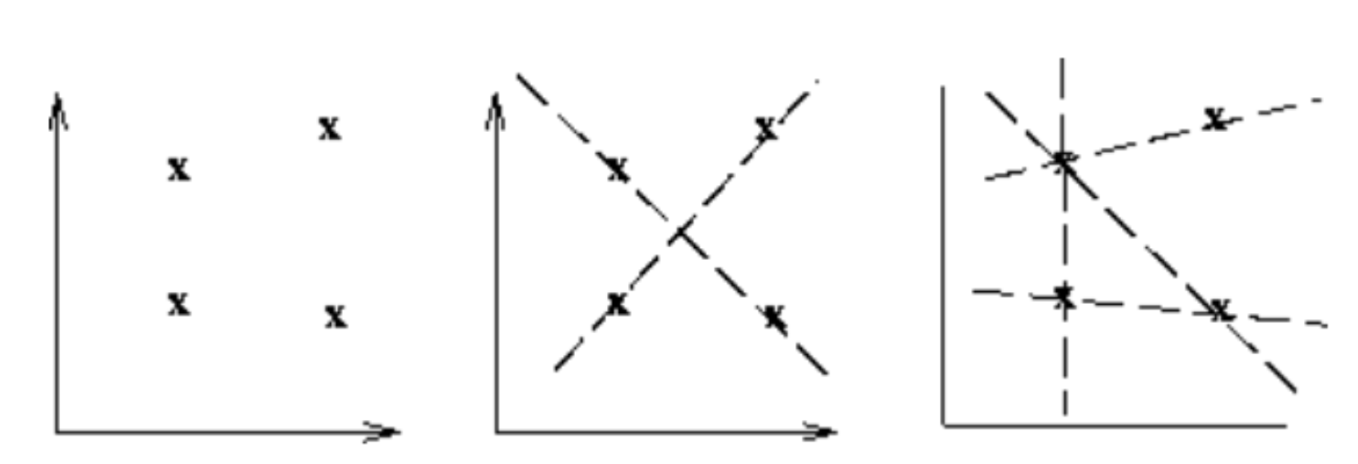

#### **Why to use?**
The Hough transform is a powerful image processing technique used for detecting complex shapes and patterns, such as lines and circles. It is highly robust to noise and image distortions, and can accurately detect shapes at varying orientations and scales.

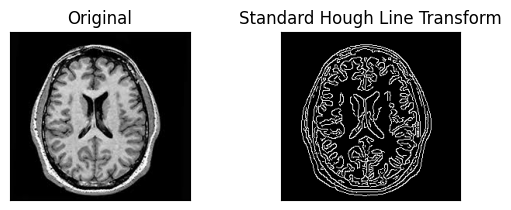

In [ ]:
import math

# Hough transform

# apply Canny
dst = cv.Canny(img, 100, 200, None, 3)

# turn image to grayscale
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# copy edges to the images that will display the results
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
if lines is not None:
      for i in range(0, len(lines)):
          rho = lines[i][0][0]
          theta = lines[i][0][1]
          a = math.cos(theta)
          b = math.sin(theta)
          x0 = a * rho
          y0 = b * rho
          pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
          pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
          cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# plotting images
plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(cdst,cmap = 'gray')
plt.title('Standard Hough Line Transform'), plt.xticks([]), plt.yticks([])

plt.show()